In [28]:
import tensorflow as tf 
print(tf.__version__)
import numpy as np
import matplotlib.pyplot as plt

2.18.0


The [Fashion Mnist dataset](https://github.com/zalandoresearch/fashion-mnist) is a collection of greyscale 28x28 pixels of clothing images.

 Each image is is assosiated with a label as shown in table below.

| Label| Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandals |
| 6 | Shirt |
| 7 | Sneakers |
| 8 | Bag |
| 9 | Ankle boot |

In [29]:
# load the dataset
fmnist = tf.keras.datasets.fashion_mnist 
# load dataset 
(training_images , training_labels), (test_images, test_labels) = fmnist.load_data()

# How does these values looks like?
Let's print a training image (both as an numpy array and as an image) to see how the values look like.

 Experiment with different indices in array. For Example: also take a look at index 42. That's different boot than one at index 0.

LABEL: 9
n\image: PIXELS ARRAY
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1

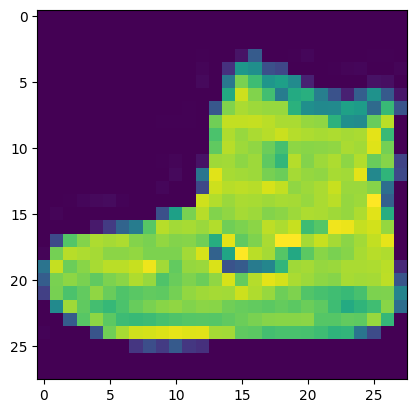

In [30]:
index = 0
# set number of cahracters pr row when printing
np.set_printoptions(linewidth=320)
# print label and image 
print(f'LABEL: {training_labels[index]}')
print (f'n\image: PIXELS ARRAY\n{training_images[index]}')
# display image
plt.imshow(training_images[index])

We'll notice that all of the values in the numbers are beween 0 to 255.

 If we're training a neural network especially in image processing for various reasons it'll usually learn better if we scale all values between 0 to 1.
 
  So we'll divide all the values by 255. This is called normalization. We'll do this for both the training and testing data.

In [31]:
# normalize the data
teaining_images = teaining_images / 255.0
test_images = test_images / 255.0

LABEL: 9
n\image: PIXELS ARRAY
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+

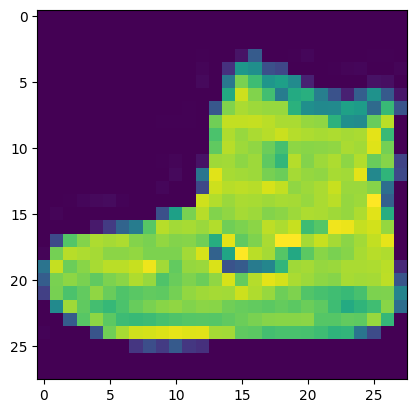

In [32]:
index = 0
# set number of cahracters pr row when printing
np.set_printoptions(linewidth=320)
# print label and image 
print(f'LABEL: {training_labels[index]}')
print (f'n\image: PIXELS ARRAY\n{teaining_images[index]}')
# display image
plt.imshow(teaining_images[index])

In [33]:
# model Traning 
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

# sequential defines a sequence of layers in neural network 
# Dense adds a layer of neurons  
# Softmax function gives probability to anything and that thing have hingh probability will give us the number of neurons that is unseen 

In [34]:
# Declare a sample input and convert to a tensor 
inputs = np.array([[1.0,3.0,4.0,2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')
# feed the inputs to a softmax function  
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')
# get sum of alll values after softmax 
sum = tf.reduce_sum(outputs)
print(f'sum of outputs:{sum}')
# Get the index with highest value 
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')


input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs:1.0
class with highest probability: 2


In [37]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images , training_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 13ms/step - accuracy: 0.8214 - loss: 0.5295
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.8317 - loss: 0.4853
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.8297 - loss: 0.4924
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.8339 - loss: 0.4787
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8411 - loss: 0.4685
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 23ms/step - accuracy: 0.8361 - loss: 0.4734
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.8383 - loss: 0.4622
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.8400 - loss: 0.4583
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.8339 - loss: 0.4970
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 13ms/step - accuracy: 0.8474 - loss: 0.4485


In [38]:
# evaluate the model 
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1205 - loss: 2.7193


[2.7261979579925537, 0.11550000309944153]

In [41]:
(X_train , y_train) ,(X_test, y_test) = fmnist.load_data()

In [44]:
import tensorflow as tf
from tensorflow.keras.callbacks import Callback


class EarlyStoppingOnLoss(Callback):
    def on_epoch_end(self, epoch, logs=None):
        current_loss = logs.get('loss')  # Get the current loss
        if current_loss < 0.25:  # Check if loss is less than 0.25
            print(f"\nStopping training: Loss ({current_loss:.4f}) < 0.25")
            self.model.stop_training = True  # Stop training 
model.fit(X_train, y_train, epochs=10, callbacks=[EarlyStoppingOnLoss()])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.8465 - loss: 0.4447
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8459 - loss: 0.4493
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8444 - loss: 0.4745
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4862s 3s/step - accuracy: 0.8460 - loss: 0.4413
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 40ms/step - accuracy: 0.8486 - loss: 0.4306
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.8522 - loss: 0.4259
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 20ms/step - accuracy: 0.8501 - loss: 0.4330
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 22ms/step - accuracy: 0.8482 - loss: 0.4383
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 27ms/step - accuracy: 0.8445 - loss: 0.4458
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.8510 - loss: 0.4258


In [46]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8388 - loss: 0.5877


[0.6180967688560486, 0.8282999992370605]